In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def read_valid_table(valid_table, group):
    valid_df = pd.read_csv(valid_table)
    valid_df["group"] = group
    return valid_df

In [3]:
root_dir = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization"
groups = ["white_british_male", "white_british_female", "pre_menopause", "post_menopause"]


valid_dfs = []

for group in groups:
    filename = os.path.join(root_dir, group, "data/validation/valid_mean.csv")
    valid_df_group = read_valid_table(filename, group)
    valid_dfs.append(valid_df_group)

In [4]:
valid_df = pd.concat(valid_dfs)

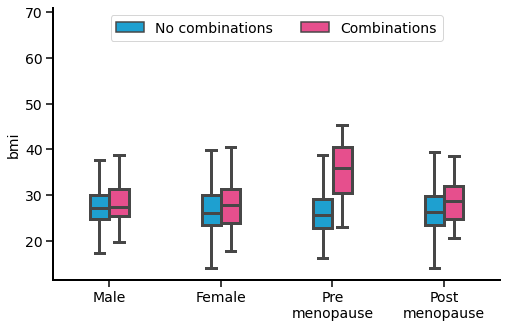

In [5]:
boxdf = valid_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(8, 5))

# Box Plot
sns_ax = sns.boxplot(
    data=boxdf,
    x="group",
    y="bmi",
    hue="vtype",
    hue_order=["No combinations", "Combinations"],
    palette=["#00ADEE", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#c1272d"
    orient="v",
    width=0.35,
    linewidth=3,
    fliersize=0.,
    ax=ax
    )

# Adjust Axis
sns_ax.set_xlabel("")
sns_ax.set_xticklabels(["Male", "Female", "Pre\nmenopause", "Post\nmenopause"], rotation=0) # sns_ax.get_xticklabels(

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# legend below as multiple columns
h,l = sns_ax.axes.get_legend_handles_labels()
sns_ax.axes.legend_.remove()
sns_ax.legend(h,l, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1))

In [7]:
def run_ttest(lower_group, higher_group):
    return ttest_ind(lower_group, higher_group, alternative="less")

In [8]:
for g in groups:
    print(f"Running t-test for {g}")
    single_hit_g = valid_df.loc[(valid_df.vtype=="No combinations")&(valid_df.group==g)]
    combo_hit_g = valid_df.loc[(valid_df.vtype=="Combinations")&(valid_df.group==g)]
    ttest_res = run_ttest(single_hit_g.bmi, combo_hit_g.bmi)
    print(f"TTest results:\tStatistics={ttest_res[0]};p-val={ttest_res[1]}")

Running t-test for white_british_male
TTest results:	Statistics=-1.276433934981247;p-val=0.1009113765671698
Running t-test for white_british_female
TTest results:	Statistics=-2.5880351719434502;p-val=0.004830025888019251
Running t-test for pre_menopause
TTest results:	Statistics=-3.0695388220898145;p-val=0.001077284825475058
Running t-test for post_menopause
TTest results:	Statistics=-1.889253706885167;p-val=0.029443454451975107
